In [1]:
from autoload_models import *

In [2]:
FindLowestBashivanModelInception(3, 'mixed5a')

'/home/jose/Desktop/lucent-things/Results_Bashivan_Inception/ROI_3_Layer_mixed5a/ROI_3_Layer_mixed5a_0_Inception/Bashivan_Inception_3_mixed5a_epoch_13_loss_0.1333842394541893_smoothweight_0.01_sparseweight_1e-08_weightdecay_0.001.pt'

In [6]:
FindLowestBashivanModelVgg(3, 10)

'/home/jose/Desktop/lucent-things/Results_Bashivan_Vgg/ROI_3_Layer_10/ROI_3_Layer_10_0/Bashivan_Vgg_3_10_epoch_12_loss_0.08944599568044988_smoothweight_0.01_sparseweight_1e-08_weightdecay_0.001.pt'

In [7]:
FindLowestCadenaModelInception(10, 'conv2d2')

'/home/jose/Desktop/lucent-things/Results_Cadena_Inception/ROI_10_Layer_conv2d2/ROI_10_Layer_conv2d2_0_/Inception_model_10_conv2d2_epoch_8_loss_0.10019534137015827_sparsity_0.01_smoothness_0.1_groupsparsity_0.001.pt'

In [8]:
FindLowestCadenaModelVgg(10, 12)

'/home/jose/Desktop/lucent-things/Results_Cadena_Vgg/ROI_10_Layer_12/ROI_10_Layer_12_0_Vgg/Vgg_model_10_12_epoch_9_loss_0.19151701668520363_sparsity_0.001_smoothness_0.001_groupsparsity_0.01.pt'

In [11]:
net = BashivanInception(3, 'conv2d2')

conv2d2
RedirectedReluLayer()
/home/jose/Desktop/lucent-things/Results_Bashivan_Inception/ROI_3_Layer_conv2d2/ROI_3_Layer_conv2d2_0_Inception/Bashivan_Inception_3_conv2d2_epoch_15_loss_0.11123535863014508_smoothweight_0.01_sparseweight_1e-08_weightdecay_0.001.pt


Loaded Bashivan_Inception_3_conv2d2_epoch_15_loss_0.11123535863014508_smoothweight_0.01_sparseweight_1e-08_weightdecay_0.001.pt


In [13]:
import numpy as np

In [12]:
net = net.cuda()

In [58]:
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from helper import makeGaussian, FeatureExtractor, fix_parameters, load_sta
from lucent.modelzoo import vgg19, util
import matplotlib.pyplot as plt
import numpy as np

class VggShape(nn.Module):

    def __init__(self, pretrained_model, conv_layer = 0, num_neurons = 43, device = None):
        super(VggShape, self).__init__()

        
        self.features_to_extract = [0,2,5,7,10,12,14,16,19,21,23,25,28,30,32,34]
        self.conv_layer = conv_layer
        print('conv_layer:  ', self.conv_layer, type(self.conv_layer))
        print('FTE:         ', self.features_to_extract)
        print('conv in FTE', self.conv_layer in self.features_to_extract)
        print('\n\n')

        self.vgg_pretrained = pretrained_model
        self.ann = fix_parameters(self.vgg_pretrained)
        self.feature_extractor = FeatureExtractor(self.ann, layers = ['features.'+str(self.conv_layer)])

        dummy_input  = torch.ones(1, 3, 224, 224)
        dummy_output = self.feature_extractor(dummy_input)
        print(dummy_output.keys(), dummy_output[list(dummy_output.keys())[0]].shape)
        dummy_output_shape = list(dummy_output[list(dummy_output.keys())[0]].shape)
        self.w_shape = dummy_output_shape[1:] + [num_neurons]
        self.w = dummy_output_shape
        
        
    def shape(self):
        return self.w
    def mod_shape(self):
        return self.w_shape

    
vgg_pretrained = vgg19(pretrained = True)
vgge = VggShape(vgg_pretrained)
sw = vgge.shape()

NameError: name 'VggShape' is not defined

In [15]:
shapes       = []
shapes_dummy = []
for i in range(36):
    vgge = VggShape(vgg_pretrained, conv_layer = i)
    shapes.append(vgge.shape())
    shapes_dummy.append(vgge.mod_shape())

features.0
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
dict_keys(['features.0']) torch.Size([1, 64, 224, 224])
features.1
ReLU(inplace=True)
dict_keys(['features.1']) torch.Size([1, 64, 224, 224])
features.2
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
dict_keys(['features.2']) torch.Size([1, 64, 224, 224])
features.3
ReLU(inplace=True)
dict_keys(['features.3']) torch.Size([1, 64, 224, 224])
features.4
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
dict_keys(['features.4']) torch.Size([1, 64, 112, 112])
features.5
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
dict_keys(['features.5']) torch.Size([1, 128, 112, 112])
features.6
ReLU(inplace=True)
dict_keys(['features.6']) torch.Size([1, 128, 112, 112])
features.7
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
dict_keys(['features.7']) torch.Size([1, 128, 112, 112])
features.8
ReLU(inplace=True)
dict_keys(['features.8']) torch.S

In [16]:
shapes

[[1, 64, 224, 224],
 [1, 64, 224, 224],
 [1, 64, 224, 224],
 [1, 64, 224, 224],
 [1, 64, 112, 112],
 [1, 128, 112, 112],
 [1, 128, 112, 112],
 [1, 128, 112, 112],
 [1, 128, 112, 112],
 [1, 128, 56, 56],
 [1, 256, 56, 56],
 [1, 256, 56, 56],
 [1, 256, 56, 56],
 [1, 256, 56, 56],
 [1, 256, 56, 56],
 [1, 256, 56, 56],
 [1, 256, 56, 56],
 [1, 256, 56, 56],
 [1, 256, 28, 28],
 [1, 512, 28, 28],
 [1, 512, 28, 28],
 [1, 512, 28, 28],
 [1, 512, 28, 28],
 [1, 512, 28, 28],
 [1, 512, 28, 28],
 [1, 512, 28, 28],
 [1, 512, 28, 28],
 [1, 512, 14, 14],
 [1, 512, 14, 14],
 [1, 512, 14, 14],
 [1, 512, 14, 14],
 [1, 512, 14, 14],
 [1, 512, 14, 14],
 [1, 512, 14, 14],
 [1, 512, 14, 14],
 [1, 512, 14, 14]]

In [17]:
shapes_dummy

[[64, 224, 224, 43],
 [64, 224, 224, 43],
 [64, 224, 224, 43],
 [64, 224, 224, 43],
 [64, 112, 112, 43],
 [128, 112, 112, 43],
 [128, 112, 112, 43],
 [128, 112, 112, 43],
 [128, 112, 112, 43],
 [128, 56, 56, 43],
 [256, 56, 56, 43],
 [256, 56, 56, 43],
 [256, 56, 56, 43],
 [256, 56, 56, 43],
 [256, 56, 56, 43],
 [256, 56, 56, 43],
 [256, 56, 56, 43],
 [256, 56, 56, 43],
 [256, 28, 28, 43],
 [512, 28, 28, 43],
 [512, 28, 28, 43],
 [512, 28, 28, 43],
 [512, 28, 28, 43],
 [512, 28, 28, 43],
 [512, 28, 28, 43],
 [512, 28, 28, 43],
 [512, 28, 28, 43],
 [512, 14, 14, 43],
 [512, 14, 14, 43],
 [512, 14, 14, 43],
 [512, 14, 14, 43],
 [512, 14, 14, 43],
 [512, 14, 14, 43],
 [512, 14, 14, 43],
 [512, 14, 14, 43],
 [512, 14, 14, 43]]

In [6]:
import torch
from torch import nn 

import numpy as np
import os
from scipy import stats
import hashlib
import inspect
import random
#from cnn_sys_ident.utils import *
#from cnn_sys_ident.base import Model

class ConvNet(nn.Module):

    #def __init__(self, in_channels,  out_channels, kernel_sizes, strides, paddings, smooth_weights, sparse_weights) -> None:
    def __init__(self, in_channels,  out_channels, kernel_sizes, n_neurons, strides = [1,1,1], paddings = ['valid', 'same', 'same'], ) -> None:
        super(nn.Module, self).__init__()
        
        assert len(kernel_sizes) == len(out_channels) == len(strides) == len(paddings)
        #assert len(paddings) == len(smooth_weights) == len(sparse_weights)
        #self.elu = torch.nn.functional.elu()

        self.W = []
        self.conv_layers = []
        self.readout_sparseness_regularizer = 0.0

        for i, (in_channel,
                out_channel,
                kernel_size, 
                stride, 
                padding,
                ) in enumerate(zip(in_channels, 
                                            out_channels,
                                            kernel_sizes,
                                            strides,
                                            paddings,)):
            self.conv_layers.append(torch.nn.Conv2d(in_channel, 
                                               out_channel,
                                               kernel_size,
                                               ))
            
        for i in self.conv_layers: print(i)

        #print(self.conv_layers[-1].shape)
        #for j in dir(self.conv_layers[-1]):
        #    print(j)

        block = '''x = [1,1,1] # pa borrar

        px_x_conv = x.shape[-2]
        px_y_conv = x.shape[-1]
        px_conv   = px_x_conv * px_y_conv

        self.conv_flat      = ()

        self.W_spatial      = torch.zeros(px_conv, n_neurons)
        self.W_spatial      = nn.Parameter(torch.nn.init.trunc_normal_(self.W_spatial, 0, 0.01))
        self.W_spatial_flat = self.W_spatial.view(px_conv, 1, 1, n_neurons)

        self.W_features     = torch.nn.init.trunc_normal_(torch.zeros((out_channels[-1], n_neurons)), 0, 0.01)
        '''

    def forward(self, x):
        for layer in self.conv_layers:
            x = layer(x)
            x = torch.nn.functional.elu(x)
            bn = nn.BatchNorm2d(x.shape[1])
            x = bn(x)





        return x


######################################################
######################################################
######################################################


test = 1

if test:

    from torchvision import datasets, transforms
    from torchvision.io import read_image
    import PIL
    
    in_channels = [3, 32, 32]
    out_channels = [32,32,32]
    kernel_sizes = [13,3, 3]
    strides = [1,1,1]
    cn = ConvNet(in_channels, out_channels, kernel_sizes, n_neurons=43)

    #-----------------------


    transform = transforms.Compose([transforms.Resize(40),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])])
    
    imgs_path      = 'E:/Jose/Data/THINGS_imgs/train/'
    val_imgs_path  = 'E:/Jose/Data/THINGS_imgs/val/'

    dataset = datasets.ImageFolder(imgs_path, transform=transform)
    dataset_val = datasets.ImageFolder(val_imgs_path, transform=transform)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=54, shuffle=False)
    #print(dataset)

    im, _ = next(iter(dataloader))
    print('Image shape:   ', im.shape)
    
    result = cn.forward(im)
    print('Results shape:  ', result.shape)


c:\Users\lopez\Anaconda3\envs\test_install_cuda_with_pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Conv2d(3, 32, kernel_size=(13, 13), stride=(1, 1))
Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
Image shape:    torch.Size([54, 3, 40, 40])
Results shape:   torch.Size([54, 32, 24, 24])


In [7]:
import tensorflow as tf

In [8]:
ex = np.random.rand(54, 32, 24, 24)
ex.reshape(-1, 576, 32, 1)
print(ex.shape)

(54, 32, 24, 24)


In [9]:
W_spatial = np.random.rand(576, 43)

In [26]:
conv_flat = torch.randn(54, 32, 1, 169)
w_spatial_flat  = torch.randn(169, 1,1,43)

conv_flat = torch.randn(54, 169, 32, 1)
w_spatial_flat  = torch.randn(43,1,1,169)

torch.nn.functional.conv2d(conv_flat, w_spatial_flat)


RuntimeError: Given groups=1, weight of size [43, 1, 1, 169], expected input[54, 169, 32, 1] to have 1 channels, but got 169 channels instead

In [27]:
import itertools

In [47]:
# ALL OPTIONS APPEAR DOWN HERE,USED SHAPES MARKED IN BLUE
options, correct = 0, 0
for i in itertools.permutations([54, 169, 32, 1]):
    for j in itertools.permutations([169, 1, 1, 55]):
        conv_flat = torch.randn(*i)
        w_spatial_flat  = torch.randn(*j)
        options = options+1
        try:
            result = torch.nn.functional.conv2d(conv_flat, w_spatial_flat)
            print(i, '   ', j, '          ', result.shape)
            correct = correct +1
        except:
            pass
print(correct, '/', options)

(54, 169, 32, 1)     (55, 169, 1, 1)            torch.Size([54, 55, 32, 1])
(54, 169, 32, 1)     (55, 169, 1, 1)            torch.Size([54, 55, 32, 1])
(54, 169, 1, 32)     (55, 169, 1, 1)            torch.Size([54, 55, 1, 32])
(54, 169, 1, 32)     (55, 169, 1, 1)            torch.Size([54, 55, 1, 32])
(54, 1, 169, 32)     (169, 1, 55, 1)            torch.Size([54, 169, 115, 32])
(54, 1, 169, 32)     (169, 1, 55, 1)            torch.Size([54, 169, 115, 32])
(54, 1, 169, 32)     (55, 1, 169, 1)            torch.Size([54, 55, 1, 32])
(54, 1, 169, 32)     (55, 1, 169, 1)            torch.Size([54, 55, 1, 32])
(54, 1, 32, 169)     (169, 1, 1, 55)            torch.Size([54, 169, 32, 115])
(54, 1, 32, 169)     (169, 1, 1, 55)            torch.Size([54, 169, 32, 115])
(54, 1, 32, 169)     (55, 1, 1, 169)            torch.Size([54, 55, 32, 1])
(54, 1, 32, 169)     (55, 1, 1, 169)            torch.Size([54, 55, 32, 1])
(32, 169, 54, 1)     (55, 169, 1, 1)            torch.Size([32, 55, 54, 1])


In [21]:
conv_flat = tf.random.normal((54, 169, 32, 1), 0, .01)
w_spatial_flat = tf.random.normal((169, 1, 1, 55), 0, .01)
tf.nn.conv2d(conv_flat, w_spatial_flat, strides = [1,1,1,1], padding='VALID')

<tf.Tensor: shape=(54, 1, 32, 55), dtype=float32, numpy=
array([[[[ 1.60412036e-03,  4.17214964e-04, -3.73215618e-04, ...,
           1.65351469e-03,  2.95185571e-04,  2.59165675e-03],
         [ 1.90500182e-03,  1.70033216e-03,  1.61419064e-03, ...,
           1.30022840e-06, -8.09307327e-04, -9.50414804e-04],
         [ 5.85827147e-05,  9.90169865e-05, -2.43460783e-03, ...,
          -2.77141789e-05,  2.42563151e-03,  7.45375350e-04],
         ...,
         [ 1.21857971e-03,  5.39551140e-04, -1.12430309e-03, ...,
          -5.12155646e-04, -1.27393228e-03, -9.55212963e-05],
         [ 2.88109673e-04,  3.74002033e-04, -2.92462966e-04, ...,
           1.62687106e-03, -7.09999062e-04,  3.04017420e-04],
         [ 2.44027426e-04, -2.86044611e-04, -8.09413963e-04, ...,
          -1.17639406e-03, -1.10159116e-03,  1.59233809e-04]]],


       [[[ 8.02094291e-05, -5.22078830e-04, -5.40507390e-05, ...,
           3.65371793e-03, -4.53522603e-04,  2.61045090e-04],
         [ 3.09503084e-04,  1

<tf.Tensor: shape=(54, 1, 32, 55), dtype=float32, numpy=
array([[[[ 1.26850139e-03, -2.70349556e-03, -3.20244301e-03, ...,
          -1.14344864e-03,  2.60487781e-03, -1.19431003e-03],
         [ 2.12274259e-03,  2.57920055e-03,  1.58308540e-03, ...,
           7.23338744e-04, -5.70198696e-04, -1.05345331e-03],
         [ 1.64031831e-03,  1.79351788e-04, -1.02913077e-03, ...,
           8.55317849e-05, -1.96256279e-03,  9.11435985e-04],
         ...,
         [ 1.98840979e-03,  3.93293012e-04,  1.34366433e-04, ...,
           1.37273537e-03, -1.75602006e-04,  1.40861026e-04],
         [ 2.24512233e-03,  6.86684973e-04,  7.31278051e-05, ...,
           1.70216372e-03,  3.96068994e-04,  1.90826121e-03],
         [-2.75617698e-03, -1.87044463e-03, -1.94357580e-03, ...,
           6.30953757e-04,  1.67098839e-03,  1.53884757e-03]]],


       [[[-1.23207679e-03, -1.91548810e-04, -1.95643865e-03, ...,
          -2.64315953e-04,  1.83474983e-03, -9.24907508e-05],
         [-5.19676250e-04,  1

In [70]:
x_in = np.array([[
  [[2], [1], [2], [0], [1]],
  [[1], [3], [2], [2], [3]],
  [[1], [1], [3], [3], [0]],
  [[2], [2], [0], [1], [1]],
  [[0], [0], [3], [1], [2]], ]])

print(x_in.shape)

kernel_in = np.array([
    [ [[2, 0.1]], [[3, 0.2]] ],
    [ [[0, 0.3]], [[1, 0.4]] ], ])
x = tf.constant(x_in, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='VALID')



(1, 5, 5, 1)


<tf.Tensor: shape=(1, 4, 4, 2), dtype=float32, numpy=
array([[[[10.       ,  1.9000001],
         [10.       ,  2.2      ],
         [ 6.       ,  1.6      ],
         [ 6.       ,  2.       ]],

        [[12.       ,  1.4      ],
         [15.       ,  2.2      ],
         [13.       ,  2.7      ],
         [13.       ,  1.7      ]],

        [[ 7.       ,  1.7      ],
         [11.       ,  1.3      ],
         [16.       ,  1.3000001],
         [ 7.       ,  1.       ]],

        [[10.       ,  0.6      ],
         [ 7.       ,  1.4      ],
         [ 4.       ,  1.5      ],
         [ 7.       ,  1.4000001]]]], dtype=float32)>

In [64]:
tf.reduce_sum(tf.multiply(h_spatial, w_features), [0,1])

<tf.Tensor: shape=(), dtype=float32, numpy=-0.001621549>

In [ ]:
import lucent

In [1]:
########################################################

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

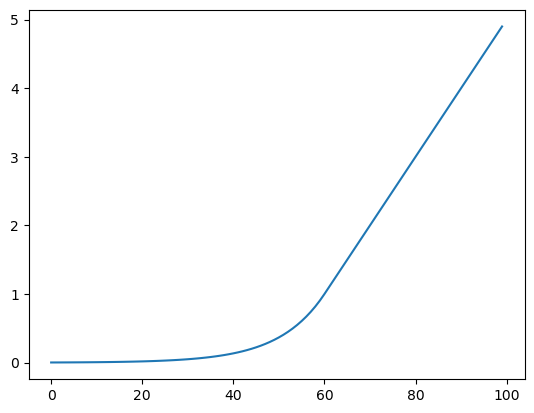

In [13]:
plt.plot(torch.nn.functional.elu(torch.Tensor(list(np.arange(-5,5,.1)-1)))+1)

In [2]:
######################################################

In [6]:
from lucent.modelzoo import inceptionv1, util
from helper import makeGaussian, FeatureExtractor, fix_parameters, load_sta

pretrained_model = inceptionv1(pretrained=True)

In [9]:
ann = fix_parameters(pretrained_model)

In [55]:
pretrained_model.modules()

<generator object Module.modules at 0x00000264B79B5820>

In [34]:
inc = FeatureExtractor(ann, layers = ['conv2d2'])

conv2d2
RedirectedReluLayer()


In [67]:
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from helper import makeGaussian, FeatureExtractor, fix_parameters, load_sta
from lucent.modelzoo import vgg19, inceptionv1, util
import matplotlib.pyplot as plt
import numpy as np

class InceptionNet(nn.Module):

    def __init__(self, pretrained_model, layer = 'conv2d2', num_neurons = 43, device = None):
        super(InceptionNet, self).__init__()

        self.features_to_extract = ['conv2d2', 'mixed4d', 'mixed4a']
        self.layer = layer
        print('Layer:  ', self.layer, type(self.layer))
        print('FTE:         ', self.features_to_extract)
        print('conv in FTE', self.layer in self.features_to_extract)
        print('\n\n')

        self.inception_pretrained = pretrained_model
        self.ann = fix_parameters(self.inception_pretrained)
        self.feature_extractor = FeatureExtractor(self.ann, layers = [self.layer])

        dummy_input  = torch.ones(1, 3, 224, 224)
        dummy_output = self.feature_extractor(dummy_input)
        print(dummy_output.keys(), dummy_output[list(dummy_output.keys())[0]].shape)
        dummy_output_shape = list(dummy_output[list(dummy_output.keys())[0]].shape)
        self.w_shape = dummy_output_shape[1:] + [num_neurons]
        self.w = dummy_output_shape
        
        
    def shape(self):
        return self.w
    def mod_shape(self):
        return self.w_shape

    
incept_pretrained = inceptionv1(pretrained = True)
incept = InceptionNet(incept_pretrained)
sw     = incept.shape()

Layer:   conv2d2 <class 'str'>
FTE:          ['conv2d2', 'mixed4d', 'mixed4a']
conv in FTE True



conv2d2
RedirectedReluLayer()
dict_keys(['conv2d2']) torch.Size([1, 192, 56, 56])


In [68]:
layers_list = ['conv2d2', 'mixed4d', 'mixed4a']

for i in layers_list:
    incept = InceptionNet(incept_pretrained, layer=i)
    sw     = incept.shape()

Layer:   conv2d2 <class 'str'>
FTE:          ['conv2d2', 'mixed4d', 'mixed4a']
conv in FTE True



conv2d2
RedirectedReluLayer()
dict_keys(['conv2d2']) torch.Size([1, 192, 56, 56])
Layer:   mixed4d <class 'str'>
FTE:          ['conv2d2', 'mixed4d', 'mixed4a']
conv in FTE True



mixed4d
CatLayer()
dict_keys(['mixed4d']) torch.Size([1, 528, 14, 14])
Layer:   mixed4a <class 'str'>
FTE:          ['conv2d2', 'mixed4d', 'mixed4a']
conv in FTE True



mixed4a
CatLayer()
dict_keys(['mixed4a']) torch.Size([1, 508, 14, 14])


In [35]:
import torch

In [36]:
dummy_input  = torch.ones(1, 3, 224, 224)
dummy_output = inc(dummy_input)


In [40]:
dummy_output['conv2d2'].shape

torch.Size([1, 192, 56, 56])

In [1]:
r = {'a':1, 'b':2}

In [3]:
r.items()

dict_items([('a', 1), ('b', 2)])

In [7]:
import re

re.match(r'ROI_(\d+)_layer_(\d+).(\d+)_Vgg', 'ROI_3_layer_4.5678_Vgg').groups()

('3', '4', '5678')

In [15]:
sparsity       = [10e-2, 10e-3, 10e-4]
smoothness     = [10e-1, 10e-2, 10e-3]
group_sparsity = [10e-3, 10e-4, 10e-5]

hyperparam_list = [sparsity, smoothness, group_sparsity]

import itertools
for n, i in enumerate(itertools.product(*hyperparam_list)):
    print(n, i)

0 (0.1, 1.0, 0.01)
1 (0.1, 1.0, 0.001)
2 (0.1, 1.0, 0.0001)
3 (0.1, 0.1, 0.01)
4 (0.1, 0.1, 0.001)
5 (0.1, 0.1, 0.0001)
6 (0.1, 0.01, 0.01)
7 (0.1, 0.01, 0.001)
8 (0.1, 0.01, 0.0001)
9 (0.01, 1.0, 0.01)
10 (0.01, 1.0, 0.001)
11 (0.01, 1.0, 0.0001)
12 (0.01, 0.1, 0.01)
13 (0.01, 0.1, 0.001)
14 (0.01, 0.1, 0.0001)
15 (0.01, 0.01, 0.01)
16 (0.01, 0.01, 0.001)
17 (0.01, 0.01, 0.0001)
18 (0.001, 1.0, 0.01)
19 (0.001, 1.0, 0.001)
20 (0.001, 1.0, 0.0001)
21 (0.001, 0.1, 0.01)
22 (0.001, 0.1, 0.001)
23 (0.001, 0.1, 0.0001)
24 (0.001, 0.01, 0.01)
25 (0.001, 0.01, 0.001)
26 (0.001, 0.01, 0.0001)


In [16]:
a = 0.00001

roi = 3
layer = 14

spa = 10e-3
smo = 10e-2
gsp = 10e-4

import subprocess as sp
sp.call(['python', 'train_cadena_model_vgg.py', '-r', str(roi), '-l', str(layer), '-spa', str(spa), '-smo', str(smo), '-gsp', str(gsp)], shell=True)

#f'value a is {a:e}'

'value a is 1.000000e-05'

In [13]:
import os 

os.system(' '.join(['python', 'train_cadena_model_vgg.py', '-r', str(roi), '-l', str(layer), '-spa', str(spa), '-smo', str(smo), '-gsp', str(gsp)]))

1

In [6]:
10e-4==1e-3

True

In [ ]:
import subprocess as sp
sp.call(['python', 'train_cadena_model_vgg', '-r', roi, '-l', layer, '-spa', spa, '-smo', smo, '-gsp', gsp])